In [78]:
using Distributions, Plots

In [136]:
δ = 0.05
μ_grid = -20:δ:0
σ_grid = δ:δ:20

0.05:0.05:20.0

In [137]:
# The function keeps the interval fixed at [-α, α+β]
# and it searches over the grid of μ, and σ to find (hopefully) the best μ and σ
# and if it doesn't exist, it tells no
function trunc_points(α, β; err_threshold = 0.1) #assume α, β > 0
    best_err = Inf
    best_params = (0.0, 0.0)
    for μ in μ_grid
        for σ in σ_grid
            #See the mean of the distribution truncated for 
           dist = TruncatedNormal(μ, σ, -α, α+β)
           m = mean(dist) #want this to be 0
           s = std(dist) #want this to be 1
           err = sqrt((m-0)^2 + (s-1)^2)
           if err < best_err
                best_err = err
                best_params = (μ, σ)
                # println("New best error, $err on parameters, $best_params")
            end
        end
    end

    #return a tuple with first element saying if found/not-found
    return best_err < err_threshold, best_params, best_err 
end;

In [118]:
trunc_points(2.0, 3.0)

(true, (-0.1, 1.1), 0.003521674526054577)

In [105]:
good_αβ= []
for α in 0.02:0.02:3
    for β in 0.02:0.02:5
        if trunc_points(α, β)[1]
            push!(good_αβ, (α, β))
            print(".");flush(stdout)
        else
            print(",");flush(stdout)
        end
    end
end

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

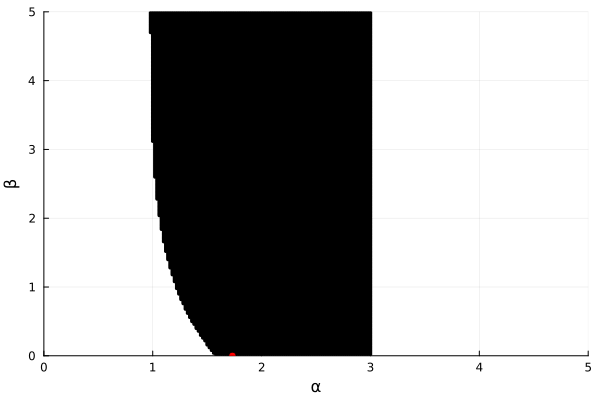

In [111]:
scatter(first.(good_αβ), last.(good_αβ), 
        xlabel = "α",  ylabel = "β",
        xlim = (0,5), ylim = (0,5), 
        label = false,
        c = :black, ms = 2.0)
scatter!([√3], [0], c = :red, ms = 4.0, label=false)

In [ ]:
(2α+β)^2/12 = 1

In [ ]:
2α+β = 12

In [108]:
√3

1.7320508075688772

In [132]:
trunc_points(1.6,0)

(true, (0.0, 20.0), 0.07663367097835061)

In [123]:
mean(TruncatedNormal(0,1.4,-2,2)), std(TruncatedNormal(0,1.4,-2,2))

(0.0, 1.0045532578321217)

In [149]:
trunc_points(1.1,3)

(true, (-20.0, 4.9), 0.0026471884895258773)

In [134]:
mean(TruncatedNormal(-5, 2.55,-1.1,6.1)), std(TruncatedNormal(-4.95, 2.55,-1.1,6.1))

(0.01415618418914466, 0.9809721090599436)